In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import os
PATH = "../csv/"
print(os.listdir(PATH))

['application_test.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
POS_CASH_balance = import_data(PATH+'POS_CASH_balance.csv')
installments_payments = import_data(PATH+'installments_payments.csv')
credit_card_balance = import_data(PATH+'credit_card_balance.csv')
previous_application = import_data(PATH+'previous_application.csv')

Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 171.69 MB
Decreased by 71.9%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 263.69 MB
Decreased by 60.9%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 130.62 MB
Decreased by 72.3%


In [4]:
#POS_CASH_balance
print(POS_CASH_balance.duplicated(subset='SK_ID_PREV').value_counts())
print(POS_CASH_balance.columns)
POS_CASH_balance.head()

True     9065033
False     936325
dtype: int64
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [5]:
df1=POS_CASH_balance.sort_values("SK_ID_PREV")
df1 = df1.drop(columns="SK_ID_CURR")
df1["COUNT"] = 1
df2 = df1.groupby(["SK_ID_PREV","NAME_CONTRACT_STATUS"]).sum()
df2.columns = "POS_" + df2.columns
df2.head(10)

POS_MONTHS_BALANCE  POS_CNT_INSTALMENT  \
SK_ID_PREV NAME_CONTRACT_STATUS                                            
1000001    Active                              -19.0                24.0   
           Amortized debt                        NaN                 NaN   
           Approved                              NaN                 NaN   
           Canceled                              NaN                 NaN   
           Completed                            -8.0                 2.0   
           Demand                                NaN                 NaN   
           Returned to the store                 NaN                 NaN   
           Signed                                NaN                 NaN   
           XNA                                   NaN                 NaN   
1000002    Active                             -210.0                22.0   

                                  POS_CNT_INSTALMENT_FUTURE  POS_SK_DPD  \
SK_ID_PREV NAME_CONTRACT_STATUS                                           
1000001    Active                                      23.0         0.0   
           Amortized debt                               NaN         NaN   
           Approved                                     NaN         NaN   
           Canceled                                     NaN         NaN   
           Completed                                    0.0         0.0   
           Demand                                       NaN         NaN   
           Returned to the store                        NaN         NaN   
           Signed                                       NaN         NaN   
           XNA                                          NaN         NaN   
1000002    Active                                      10.0         0.0   

                                  POS_SK_DPD_DEF  POS_COUNT  
SK_ID_PREV NAME_CONTRACT_STATUS                              
1000001    Active                            0.0        2.0  
           Amortized debt                    NaN        NaN  
           Approved                          NaN        NaN  
           Canceled                          NaN        NaN  
           Completed                         0.0        1.0  
           Demand                            NaN        NaN  
           Returned to the store             NaN        NaN  
           Signed                            NaN        NaN  
           XNA                               NaN        NaN  
1000002    Active                            0.0        4.0

In [6]:
df2_Active = df2.xs(key="Active",level=1)
df2_Active.columns = df2_Active.columns + "_Ac"

df2_Amortized_debt = df2.xs(key="Amortized debt",level=1)
df2_Amortized_debt.columns = df2_Amortized_debt.columns + "_Ad"

df2_Approved = df2.xs(key="Approved",level=1)
df2_Approved.columns = df2_Approved.columns + "_Ap"

df2_Canceled = df2.xs(key="Canceled",level=1)
df2_Canceled.columns = df2_Canceled.columns + "_Ca"

df2_Demand = df2.xs(key="Demand",level=1)
df2_Demand.columns = df2_Demand.columns + "_De"

df2_Returned_to_the_store = df2.xs(key="Returned to the store",level=1)
df2_Returned_to_the_store.columns = df2_Returned_to_the_store.columns + "_Re"

df2_Signed = df2.xs(key="Signed",level=1)
df2_Signed.columns = df2_Signed.columns + "_Si"

df2_XNA = df2.xs(key="XNA",level=1)
df2_XNA.columns = df2_XNA.columns + "_XN"

In [7]:
df3= pd.merge(df2_Active, df2_Amortized_debt, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Approved, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Canceled, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Demand, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Returned_to_the_store, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Signed, left_index=True, right_index=True)
df3= pd.merge(df3, df2_XNA, left_index=True, right_index=True)

In [8]:
df_POS_CASH_balance = df3.reset_index()
df_POS_CASH_balance.head()

,SK_ID_PREV,POS_MONTHS_BALANCE_Ac,POS_CNT_INSTALMENT_Ac,POS_CNT_INSTALMENT_FUTURE_Ac,POS_SK_DPD_Ac,POS_SK_DPD_DEF_Ac,POS_COUNT_Ac,POS_MONTHS_BALANCE_Ad,POS_CNT_INSTALMENT_Ad,POS_CNT_INSTALMENT_FUTURE_Ad,...,POS_CNT_INSTALMENT_FUTURE_Si,POS_SK_DPD_Si,POS_SK_DPD_DEF_Si,POS_COUNT_Si,POS_MONTHS_BALANCE_XN,POS_CNT_INSTALMENT_XN,POS_CNT_INSTALMENT_FUTURE_XN,POS_SK_DPD_XN,POS_SK_DPD_DEF_XN,POS_COUNT_XN
0,1000001,-19.0,24.0,23.0,0.0,0.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000002,-210.0,22.0,10.0,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000003,-10.0,48.0,42.0,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000004,-182.0,70.0,49.0,0.0,0.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000005,-515.0,100.0,55.0,0.0,0.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#installments_payments
print(installments_payments.duplicated(subset='SK_ID_PREV').value_counts())
print(installments_payments.columns)
installments_payments.head()

True     12607649
False      997752
dtype: int64
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [10]:
df1=installments_payments.sort_values("SK_ID_PREV")
df1 = df1.drop(columns="SK_ID_CURR")
df1["COUNT_installments_payments"] = 1
df2 = df1.groupby(["SK_ID_PREV"]).sum()
df2.columns = "inst_" + df2.columns
df2.head(10)

,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT,inst_COUNT_installments_payments
SK_ID_PREV,,,,,,,
1000001,3.0,3.0,-506.0,-538.0,6.844342e+04,6.844342e+04,2
1000002,5.0,10.0,-6220.0,-6300.0,3.723556e+04,3.723556e+04,4
1000003,3.0,6.0,-192.0,-238.0,1.485405e+04,1.485405e+04,3
1000004,8.0,28.0,-5404.0,-5592.0,3.352316e+04,3.352316e+04,7
1000005,11.0,64.0,-16976.0,-17072.0,1.617353e+05,1.470217e+05,11
1000007,5.0,15.0,-315.0,-399.0,5.623402e+04,5.623402e+04,5
1000008,10.0,45.0,-10456.0,-10784.0,2.622386e+05,2.622386e+05,9
1000009,6.0,21.0,-2292.0,-2350.0,5.581561e+04,5.581561e+04,6
1000010,12.0,66.0,-4488.0,-4600.0,1.259663e+06,1.259663e+06,11


In [11]:
df_installments_payments = df2.reset_index()
df_installments_payments.head()

,SK_ID_PREV,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT,inst_COUNT_installments_payments
0,1000001,3.0,3.0,-506.0,-538.0,68443.421875,68443.421875,2
1,1000002,5.0,10.0,-6220.0,-6300.0,37235.562500,37235.562500,4
2,1000003,3.0,6.0,-192.0,-238.0,14854.050781,14854.050781,3
3,1000004,8.0,28.0,-5404.0,-5592.0,33523.156250,33523.156250,7
4,1000005,11.0,64.0,-16976.0,-17072.0,161735.312500,147021.703125,11


In [12]:
#credit_card_balance
print(credit_card_balance.duplicated(subset='SK_ID_PREV').value_counts())
print(credit_card_balance.columns)
credit_card_balance.head()

True     3736005
False     104307
dtype: int64
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


In [13]:
df1=credit_card_balance.sort_values("SK_ID_PREV")
df1 = df1.drop(columns="SK_ID_CURR")
df1["COUNT_credit_card_balance"] = 1
df2 = df1.groupby(["SK_ID_PREV","NAME_CONTRACT_STATUS"]).sum()
df2.columns = 'credit_' + df2.columns
df2.head(10)

credit_MONTHS_BALANCE  credit_AMT_BALANCE  \
SK_ID_PREV NAME_CONTRACT_STATUS                                              
1000018    Active                                -20.0         374731.4375   
           Approved                                NaN                 NaN   
           Completed                               NaN                 NaN   
           Demand                                  NaN                 NaN   
           Refused                                 NaN                 NaN   
           Sent proposal                           NaN                 NaN   
           Signed                                  NaN                 NaN   
1000030    Active                                -36.0         447928.5000   
           Approved                                NaN                 NaN   
           Completed                               NaN                 NaN   

                                 credit_AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV NAME_CONTRACT_STATUS                                   
1000018    Active                                      405000.0   
           Approved                                         NaN   
           Completed                                        NaN   
           Demand                                           NaN   
           Refused                                          NaN   
           Sent proposal                                    NaN   
           Signed                                           NaN   
1000030    Active                                      652500.0   
           Approved                                         NaN   
           Completed                                        NaN   

                                 credit_AMT_DRAWINGS_ATM_CURRENT  \
SK_ID_PREV NAME_CONTRACT_STATUS                                    
1000018    Active                                        27000.0   
           Approved                                          NaN   
           Completed                                         NaN   
           Demand                                            NaN   
           Refused                                           NaN   
           Sent proposal                                     NaN   
           Signed                                            NaN   
1000030    Active                                         4500.0   
           Approved                                          NaN   
           Completed                                         NaN   

                                 credit_AMT_DRAWINGS_CURRENT  \
SK_ID_PREV NAME_CONTRACT_STATUS                                
1000018    Active                              147394.984375   
           Approved                                      NaN   
           Completed                                     NaN   
           Demand                                        NaN   
           Refused                                       NaN   
           Sent proposal                                 NaN   
           Signed                                        NaN   
1000030    Active                              138059.500000   
           Approved                                      NaN   
           Completed                                     NaN   

                                 credit_AMT_DRAWINGS_OTHER_CURRENT  \
SK_ID_PREV NAME_CONTRACT_STATUS                                      
1000018    Active                                              0.0   
           Approved                                            NaN   
           Completed                                           NaN   
           Demand                                              NaN   
           Refused                                             NaN   
           Sent proposal                                       NaN   
           Signed                                              NaN   
1000030    Active                                              0.0   
     

In [14]:
df2_Active = df2.xs(key="Active",level=1)
df2_Active.columns = df2_Active.columns + "_Ac"

df2_Approved = df2.xs(key="Approved",level=1)
df2_Approved.columns = df2_Approved.columns + "_Ap"

df2_Completed = df2.xs(key="Completed",level=1)
df2_Completed.columns = df2_Completed.columns + "_Co"

df2_Demand = df2.xs(key="Demand",level=1)
df2_Demand.columns = df2_Demand.columns + "_De"

df2_Refused = df2.xs(key="Refused",level=1)
df2_Refused.columns = df2_Refused.columns + "_Re"

df2_Sent_proposal = df2.xs(key="Sent proposal",level=1)
df2_Sent_proposal.columns = df2_Sent_proposal.columns + "_Sp"

df2_Signed = df2.xs(key="Signed",level=1)
df2_Signed.columns = df2_Signed.columns + "_Si"

In [15]:
df3= pd.merge(df2_Active, df2_Approved, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Completed, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Demand, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Refused, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Sent_proposal, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Signed, left_index=True, right_index=True)

In [16]:
df_credit_card_balance = df3.reset_index()
df_credit_card_balance.head()

,SK_ID_PREV,credit_MONTHS_BALANCE_Ac,credit_AMT_BALANCE_Ac,credit_AMT_CREDIT_LIMIT_ACTUAL_Ac,credit_AMT_DRAWINGS_ATM_CURRENT_Ac,credit_AMT_DRAWINGS_CURRENT_Ac,credit_AMT_DRAWINGS_OTHER_CURRENT_Ac,credit_AMT_DRAWINGS_POS_CURRENT_Ac,credit_AMT_INST_MIN_REGULARITY_Ac,credit_AMT_PAYMENT_CURRENT_Ac,...,credit_AMT_RECIVABLE_Si,credit_AMT_TOTAL_RECEIVABLE_Si,credit_CNT_DRAWINGS_ATM_CURRENT_Si,credit_CNT_DRAWINGS_CURRENT_Si,credit_CNT_DRAWINGS_OTHER_CURRENT_Si,credit_CNT_DRAWINGS_POS_CURRENT_Si,credit_CNT_INSTALMENT_MATURE_CUM_Si,credit_SK_DPD_Si,credit_SK_DPD_DEF_Si,credit_COUNT_credit_card_balance_Si
0,1000018,-20.0,374731.4375,405000.0,27000.0,147394.984375,0.0,120394.976562,12970.439453,27708.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000030,-36.0,447928.5000,652500.0,4500.0,138059.500000,0.0,133559.500000,16625.789062,43320.417969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000031,-136.0,838311.0000,2394000.0,157500.0,463353.843750,0.0,305853.843750,42804.808594,354519.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000035,-20.0,0.0000,1125000.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000077,-77.0,0.0000,1035000.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#previous_application
print(previous_application.duplicated(subset='SK_ID_PREV').value_counts())
print(previous_application.duplicated(subset='SK_ID_CURR').value_counts())
print(previous_application.columns)
previous_application.head()

False    1670214
dtype: int64
True     1331357
False     338857
dtype: int64
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1=previous_application.sort_values(["SK_ID_CURR","SK_ID_PREV"])
df1["COUNT_previous_application"] = 1
df1.dtypes

SK_ID_PREV                        int32
SK_ID_CURR                        int32
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float32
AMT_APPLICATION                 float32
AMT_CREDIT                      float32
AMT_DOWN_PAYMENT                float32
AMT_GOODS_PRICE                 float32
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START            int8
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY             int8
RATE_DOWN_PAYMENT               float16
RATE_INTEREST_PRIMARY           float16
RATE_INTEREST_PRIVILEGED        float16
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int16
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category


In [19]:
df2 = pd.merge(df1, df_POS_CASH_balance, on='SK_ID_PREV', how='left')
df2 = pd.merge(df2, df_credit_card_balance, on='SK_ID_PREV', how='left')
df2 = pd.merge(df2, df_installments_payments, on='SK_ID_PREV', how='left')

In [20]:
pd.set_option('display.max_columns', 300)
df2.iloc[range(0,100),:]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,COUNT_previous_application,POS_MONTHS_BALANCE_Ac,POS_CNT_INSTALMENT_Ac,POS_CNT_INSTALMENT_FUTURE_Ac,POS_SK_DPD_Ac,POS_SK_DPD_DEF_Ac,POS_COUNT_Ac,POS_MONTHS_BALANCE_Ad,POS_CNT_INSTALMENT_Ad,POS_CNT_INSTALMENT_FUTURE_Ad,POS_SK_DPD_Ad,POS_SK_DPD_DEF_Ad,POS_COUNT_Ad,POS_MONTHS_BALANCE_Ap,POS_CNT_INSTALMENT_Ap,POS_CNT_INSTALMENT_FUTURE_Ap,POS_SK_DPD_Ap,POS_SK_DPD_DEF_Ap,POS_COUNT_Ap,POS_MONTHS_BALANCE_Ca,POS_CNT_INSTALMENT_Ca,POS_CNT_INSTALMENT_FUTURE_Ca,POS_SK_DPD_Ca,POS_SK_DPD_DEF_Ca,POS_COUNT_Ca,POS_MONTHS_BALANCE_De,POS_CNT_INSTALMENT_De,POS_CNT_INSTALMENT_FUTURE_De,POS_SK_DPD_De,POS_SK_DPD_DEF_De,POS_COUNT_De,POS_MONTHS_BALANCE_Re,POS_CNT_INSTALMENT_Re,POS_CNT_INSTALMENT_FUTURE_Re,POS_SK_DPD_Re,POS_SK_DPD_DEF_Re,POS_COUNT_Re,POS_MONTHS_BALANCE_Si,POS_CNT_INSTALMENT_Si,POS_CNT_INSTALMENT_FUTURE_Si,POS_SK_DPD_Si,POS_SK_DPD_DEF_Si,POS_COUNT_Si,POS_MONTHS_BALANCE_XN,POS_CNT_INSTALMENT_XN,POS_CNT_INSTALMENT_FUTURE_XN,POS_SK_DPD_XN,POS_SK_DPD_DEF_XN,POS_COUNT_XN,credit_MONTHS_BALANCE_Ac,credit_AMT_BALANCE_Ac,credit_AMT_CREDIT_LIMIT_ACTUAL_Ac,credit_AMT_DRAWINGS_ATM_CURRENT_Ac,credit_AMT_DRAWINGS_CURRENT_Ac,credit_AMT_DRAWINGS_OTHER_CURRENT_Ac,credit_AMT_DRAWINGS_POS_CURRENT_Ac,credit_AMT_INST_MIN_REGULARITY_Ac,credit_AMT_PAYMENT_CURRENT_Ac,credit_AMT_PAYMENT_TOTAL_CURRENT_Ac,credit_AMT_RECEIVABLE_PRINCIPAL_Ac,credit_AMT_RECIVABLE_Ac,credit_AMT_TOTAL_RECEIVABLE_Ac,credit_CNT_DRAWINGS_ATM_CURRENT_Ac,credit_CNT_DRAWINGS_CURRENT_Ac,credit_CNT_DRAWINGS_OTHER_CURRENT_Ac,credit_CNT_DRAWINGS_POS_CURRENT_Ac,credit_CNT_INSTALMENT_MATURE_CUM_Ac,credit_SK_DPD_Ac,credit_SK_DPD_DEF_Ac,credit_COUNT_credit_card_balance_Ac,credit_MONTHS_BALANCE_Ap,credit_AMT_BALANCE_Ap,credit_AMT_CREDIT_LIMIT_ACTUAL_Ap,credit_AMT_DRAWINGS_ATM_CURRENT_Ap,credit_AMT_DRAWINGS_CURRENT_Ap,credit_AMT_DRAWINGS_OTHER_CURRENT_Ap,credit_AMT_DRAWINGS_POS_CURRENT_Ap,credit_AMT_INST_MIN_REGULARITY_Ap,credit_AMT_PAYMENT_CURRENT_Ap,credit_AMT_PAYMENT_TOTAL_CURRENT_Ap,credit_AMT_RECEIVABLE_PRINCIPAL_Ap,credit_AMT_RECIVABLE_Ap,credit_AMT_TOTAL_RECEIVABLE_Ap,credit_CNT_DRAWINGS_ATM_CURRENT_Ap,credit_CNT_DRAWINGS_CURRENT_Ap,credit_CNT_DRAWINGS_OTHER_CURRENT_Ap,credit_CNT_DRAWINGS_POS_CURRENT_Ap,credit_CNT_INSTALMENT_MATURE_CUM_Ap,credit_SK_DPD_Ap,credit_SK_DPD_DEF_Ap,credit_COUNT_credit_card_balance_Ap,credit_MONTHS_BALANCE_Co,credit_AMT_BALANCE_Co,credit_AMT_CREDIT_LIMIT_ACTUAL_Co,credit_AMT_DRAWINGS_ATM_CURRENT_Co,credit_AMT_DRAWINGS_CURRENT_Co,credit_AMT_DRAWINGS_OTHER_CURRENT_Co,credit_AMT_DRAWINGS_POS_CURRENT_Co,credit_AMT_INST_MIN_REGULARITY_Co,credit_AMT_PAYMENT_CURRENT_Co,credit_AMT_PAYMENT_TOTAL_CURRENT_Co,credit_AMT_RECEIVABLE_PRINCIPAL_Co,credit_AMT_RECIVABLE_Co,credit_AMT_TOTAL_RECEIVABLE_Co,credit_CNT_DRAWINGS_ATM_CURRENT_Co,credit_CNT_DRAWINGS_CURRENT_Co,credit_CNT_DRAWINGS_OTHER_CURRENT_Co,credit_CNT_DRAWINGS_POS_CURRENT_Co,credit_CNT_INSTALMENT_MATURE_CUM_Co,credit_SK_DPD_Co,credit_SK_DPD_DEF_Co,credit_COUNT_credit_card_balance_Co,credit_MONTHS_BALANCE_De,credit_AMT_BALANCE_De,credit_AMT_CREDIT_LIMIT_ACTUAL_De,credit_AMT_DRAWINGS_ATM_CURRENT_De,credit_AMT_DRAWINGS_CURRENT_De,credit_AMT_DRAWINGS_OTHER_CURRENT_De,credit_AMT_DRAWINGS_POS_CURRENT_De,credit_AMT_INST_MIN_REGULARITY_De,credit_AMT_PAYMENT_CURRENT_De,credit_AMT_PAYMENT_TOTAL_CURRENT_De,credit_AMT_RECEIVABLE_PRINCIPAL_De,credit_AMT_RECIVABLE_De,c

In [21]:
tmp = df2[(df2["NAME_CONTRACT_TYPE"] == 'Cash loans')]

In [22]:
pd.set_option('display.max_rows', 300)
tmp['NAME_CLIENT_TYPE'].value_counts()

Repeater     670614
Refreshed     54093
New           21628
XNA            1218
Name: NAME_CLIENT_TYPE, dtype: int64

In [23]:
tmp2 = tmp.groupby(by="SK_ID_CURR").sum()
previous_data = tmp2.reset_index()

In [24]:
previous_data.head()

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,COUNT_previous_application,POS_MONTHS_BALANCE_Ac,POS_CNT_INSTALMENT_Ac,POS_CNT_INSTALMENT_FUTURE_Ac,POS_SK_DPD_Ac,POS_SK_DPD_DEF_Ac,POS_COUNT_Ac,POS_MONTHS_BALANCE_Ad,POS_CNT_INSTALMENT_Ad,POS_CNT_INSTALMENT_FUTURE_Ad,POS_SK_DPD_Ad,POS_SK_DPD_DEF_Ad,POS_COUNT_Ad,POS_MONTHS_BALANCE_Ap,POS_CNT_INSTALMENT_Ap,POS_CNT_INSTALMENT_FUTURE_Ap,POS_SK_DPD_Ap,POS_SK_DPD_DEF_Ap,POS_COUNT_Ap,POS_MONTHS_BALANCE_Ca,POS_CNT_INSTALMENT_Ca,POS_CNT_INSTALMENT_FUTURE_Ca,POS_SK_DPD_Ca,POS_SK_DPD_DEF_Ca,POS_COUNT_Ca,POS_MONTHS_BALANCE_De,POS_CNT_INSTALMENT_De,POS_CNT_INSTALMENT_FUTURE_De,POS_SK_DPD_De,POS_SK_DPD_DEF_De,POS_COUNT_De,POS_MONTHS_BALANCE_Re,POS_CNT_INSTALMENT_Re,POS_CNT_INSTALMENT_FUTURE_Re,POS_SK_DPD_Re,POS_SK_DPD_DEF_Re,POS_COUNT_Re,POS_MONTHS_BALANCE_Si,POS_CNT_INSTALMENT_Si,POS_CNT_INSTALMENT_FUTURE_Si,POS_SK_DPD_Si,POS_SK_DPD_DEF_Si,POS_COUNT_Si,POS_MONTHS_BALANCE_XN,POS_CNT_INSTALMENT_XN,POS_CNT_INSTALMENT_FUTURE_XN,POS_SK_DPD_XN,POS_SK_DPD_DEF_XN,POS_COUNT_XN,credit_MONTHS_BALANCE_Ac,credit_AMT_BALANCE_Ac,credit_AMT_CREDIT_LIMIT_ACTUAL_Ac,credit_AMT_DRAWINGS_ATM_CURRENT_Ac,credit_AMT_DRAWINGS_CURRENT_Ac,credit_AMT_DRAWINGS_OTHER_CURRENT_Ac,credit_AMT_DRAWINGS_POS_CURRENT_Ac,credit_AMT_INST_MIN_REGULARITY_Ac,credit_AMT_PAYMENT_CURRENT_Ac,credit_AMT_PAYMENT_TOTAL_CURRENT_Ac,credit_AMT_RECEIVABLE_PRINCIPAL_Ac,credit_AMT_RECIVABLE_Ac,credit_AMT_TOTAL_RECEIVABLE_Ac,credit_CNT_DRAWINGS_ATM_CURRENT_Ac,credit_CNT_DRAWINGS_CURRENT_Ac,credit_CNT_DRAWINGS_OTHER_CURRENT_Ac,credit_CNT_DRAWINGS_POS_CURRENT_Ac,credit_CNT_INSTALMENT_MATURE_CUM_Ac,credit_SK_DPD_Ac,credit_SK_DPD_DEF_Ac,credit_COUNT_credit_card_balance_Ac,credit_MONTHS_BALANCE_Ap,credit_AMT_BALANCE_Ap,credit_AMT_CREDIT_LIMIT_ACTUAL_Ap,credit_AMT_DRAWINGS_ATM_CURRENT_Ap,credit_AMT_DRAWINGS_CURRENT_Ap,credit_AMT_DRAWINGS_OTHER_CURRENT_Ap,credit_AMT_DRAWINGS_POS_CURRENT_Ap,credit_AMT_INST_MIN_REGULARITY_Ap,credit_AMT_PAYMENT_CURRENT_Ap,credit_AMT_PAYMENT_TOTAL_CURRENT_Ap,credit_AMT_RECEIVABLE_PRINCIPAL_Ap,credit_AMT_RECIVABLE_Ap,credit_AMT_TOTAL_RECEIVABLE_Ap,credit_CNT_DRAWINGS_ATM_CURRENT_Ap,credit_CNT_DRAWINGS_CURRENT_Ap,credit_CNT_DRAWINGS_OTHER_CURRENT_Ap,credit_CNT_DRAWINGS_POS_CURRENT_Ap,credit_CNT_INSTALMENT_MATURE_CUM_Ap,credit_SK_DPD_Ap,credit_SK_DPD_DEF_Ap,credit_COUNT_credit_card_balance_Ap,credit_MONTHS_BALANCE_Co,credit_AMT_BALANCE_Co,credit_AMT_CREDIT_LIMIT_ACTUAL_Co,credit_AMT_DRAWINGS_ATM_CURRENT_Co,credit_AMT_DRAWINGS_CURRENT_Co,credit_AMT_DRAWINGS_OTHER_CURRENT_Co,credit_AMT_DRAWINGS_POS_CURRENT_Co,credit_AMT_INST_MIN_REGULARITY_Co,credit_AMT_PAYMENT_CURRENT_Co,credit_AMT_PAYMENT_TOTAL_CURRENT_Co,credit_AMT_RECEIVABLE_PRINCIPAL_Co,credit_AMT_RECIVABLE_Co,credit_AMT_TOTAL_RECEIVABLE_Co,credit_CNT_DRAWINGS_ATM_CURRENT_Co,credit_CNT_DRAWINGS_CURRENT_Co,credit_CNT_DRAWINGS_OTHER_CURRENT_Co,credit_CNT_DRAWINGS_POS_CURRENT_Co,credit_CNT_INSTALMENT_MATURE_CUM_Co,credit_SK_DPD_Co,credit_SK_DPD_DEF_Co,credit_COUNT_credit_card_balance_Co,credit_MONTHS_BALANCE_De,credit_AMT_BALANCE_De,credit_AMT_CREDIT_LIMIT_ACTUAL_De,credit_AMT_DRAWINGS_ATM_CURRENT_De,credit_AMT_DRAWINGS_CURRENT_De,credit_AMT_DRAWINGS_OTHER_CURRENT_De,credit_AMT_DRAWINGS_POS_CURRENT_De,credit_AMT_INST_MIN_REGULARITY_De,credit_AMT_PAYMENT_CURRENT_De,credit_AMT_PAYMENT_TOTAL_CURRENT_De,credit_AMT_RECEIVABLE_PRINCIPAL_De,credit_AMT_RECIVABLE_De,credit_AMT_TOTAL_RECEIVABLE_De,credit_CNT_DRAWINGS_ATM_CURRENT_De,credit_CNT_DRAWINGS_CURRENT_De,credit_CNT_DRAWINGS_OTHER_CURRENT_De,credit_CNT_DRAWINGS_POS_CURRENT_De,credit_CNT_INSTALMENT_MATURE_CUM_De,credit_SK_DPD_De,credit_SK_DPD_DEF_De,credit_COUNT_credit_card_balance_De,credit_MONTHS_BALANCE_Re,credit_AM

In [25]:
#bureau_balance
bureau_balance = import_data(PATH+'bureau_balance.csv')

Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 156.21 MB
Decreased by 75.0%


In [26]:
print(bureau_balance.duplicated(subset='SK_ID_BUREAU').value_counts())
print(bureau_balance.columns)
bureau_balance.head()

True     26482530
False      817395
dtype: int64
Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [27]:
df1=bureau_balance.sort_values("SK_ID_BUREAU")
df1["COUNT_bureau_balance"] = 1
df2 = df1.groupby(["SK_ID_BUREAU","STATUS"]).sum()
df2.columns = 'bb_' + df2.columns
df2.head(10)

bb_MONTHS_BALANCE  bb_COUNT_bureau_balance
SK_ID_BUREAU STATUS                                            
5001709      0                     NaN                      NaN
             1                     NaN                      NaN
             2                     NaN                      NaN
             3                     NaN                      NaN
             4                     NaN                      NaN
             5                     NaN                      NaN
             C                 -3655.0                     86.0
             X                 -1001.0                     11.0
5001710      0                  -254.0                      5.0
             1                     NaN                      NaN

In [28]:
df2_0 = df2.xs(key="0",level=1)
df2_0.columns = df2_0.columns + "_0"

df2_1 = df2.xs(key="1",level=1)
df2_1.columns = df2_1.columns + "_1"

df2_2 = df2.xs(key="2",level=1)
df2_2.columns = df2_2.columns + "_2"

df2_3 = df2.xs(key="3",level=1)
df2_3.columns = df2_3.columns + "_3"

df2_4 = df2.xs(key="4",level=1)
df2_4.columns = df2_4.columns + "_4"

df2_5 = df2.xs(key="5",level=1)
df2_5.columns = df2_5.columns + "_5"

df2_C = df2.xs(key="C",level=1)
df2_C.columns = df2_C.columns + "_C"

df2_X = df2.xs(key="X",level=1)
df2_X.columns = df2_X.columns + "_X"

In [29]:
df3= pd.merge(df2_0, df2_1, left_index=True, right_index=True)
df3= pd.merge(df3, df2_2, left_index=True, right_index=True)
df3= pd.merge(df3, df2_3, left_index=True, right_index=True)
df3= pd.merge(df3, df2_4, left_index=True, right_index=True)
df3= pd.merge(df3, df2_5, left_index=True, right_index=True)
df3= pd.merge(df3, df2_C, left_index=True, right_index=True)
df3= pd.merge(df3, df2_X, left_index=True, right_index=True)

In [30]:
pd.set_option('display.max_columns', 300)
df_bureau_balance = df3.reset_index()
df_bureau_balance.head()

,SK_ID_BUREAU,bb_MONTHS_BALANCE_0,bb_COUNT_bureau_balance_0,bb_MONTHS_BALANCE_1,bb_COUNT_bureau_balance_1,bb_MONTHS_BALANCE_2,bb_COUNT_bureau_balance_2,bb_MONTHS_BALANCE_3,bb_COUNT_bureau_balance_3,bb_MONTHS_BALANCE_4,bb_COUNT_bureau_balance_4,bb_MONTHS_BALANCE_5,bb_COUNT_bureau_balance_5,bb_MONTHS_BALANCE_C,bb_COUNT_bureau_balance_C,bb_MONTHS_BALANCE_X,bb_COUNT_bureau_balance_X
0,5001709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3655.0,86.0,-1001.0,11.0
1,5001710,-254.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1128.0,48.0,-2021.0,30.0
2,5001711,-6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,5001712,-135.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.0,9.0,NaN,NaN
4,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-231.0,22.0


In [31]:
#bureau
bureau = import_data(PATH+'bureau.csv')

Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 78.57 MB
Decreased by 64.7%


In [32]:
print(bureau.duplicated(subset='SK_ID_BUREAU').value_counts())
print(bureau.duplicated(subset='SK_ID_CURR').value_counts())
print(bureau.columns)
bureau.head()

False    1716428
dtype: int64
True     1410617
False     305811
dtype: int64
Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [33]:
bureau1= pd.merge(bureau, df_bureau_balance, on="SK_ID_BUREAU",how='left')
df1 = df1.drop(columns="SK_ID_BUREAU")
bureau1.sort_values("SK_ID_CURR")
bureau1.head(100)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,bb_MONTHS_BALANCE_0,bb_COUNT_bureau_balance_0,bb_MONTHS_BALANCE_1,bb_COUNT_bureau_balance_1,bb_MONTHS_BALANCE_2,bb_COUNT_bureau_balance_2,bb_MONTHS_BALANCE_3,bb_COUNT_bureau_balance_3,bb_MONTHS_BALANCE_4,bb_COUNT_bureau_balance_4,bb_MONTHS_BALANCE_5,bb_COUNT_bureau_balance_5,bb_MONTHS_BALANCE_C,bb_COUNT_bureau_balance_C,bb_MONTHS_BALANCE_X,bb_COUNT_bureau_balance_X
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,9.132300e+04,0.000000e+00,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,2.250000e+05,1.713420e+05,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,4.643235e+05,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,9.000000e+04,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.500000,0,2.700000e+06,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,5714467,Active,currency 1,-273,0,27456.0,NaN,0.000000,0,1.800000e+05,7.101738e+04,108982.617188,0.0,Credit card,-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.000000,0,4.210380e+04,4.210380e+04,0.000000,0.0,Consumer credit,-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.000000,0,7.687845e+04,0.000000e+00,0.000000,0.0,Consumer credit,-1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.000000,0,1.030077e+05,0.000000e+00,0.000000,0.0,Consumer credit,-840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000000,0,4.500000e+03,0.000000e+00,0.000000,0.0,Credit card,-690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df1=bureau1.sort_values("SK_ID_CURR")
df1["COUNT_bureau"] = 1
df2 = df1.groupby(["SK_ID_CURR","CREDIT_ACTIVE"]).sum()
df2.columns = 'b_' + df2.columns
df2.head(10)

b_SK_ID_BUREAU  b_DAYS_CREDIT  b_CREDIT_DAY_OVERDUE  \
SK_ID_CURR CREDIT_ACTIVE                                                        
100001     Active             17689905.0         -928.0                   0.0   
           Bad debt                  NaN            NaN                   NaN   
           Closed             23586526.0        -4217.0                   0.0   
           Sold                      NaN            NaN                   NaN   
100002     Active             12317812.0        -1145.0                   0.0   
           Bad debt                  NaN            NaN                   NaN   
           Closed             36908365.0        -5847.0                   0.0   
           Sold                      NaN            NaN                   NaN   
100003     Active              5885880.0         -606.0                   0.0   
           Bad debt                  NaN            NaN                   NaN   

                          b_DAYS_CREDIT_ENDDATE  b_DAYS_ENDDATE_FACT  \
SK_ID_CURR CREDIT_ACTIVE                                               
100001     Active                        3092.0                  0.0   
           Bad debt                         NaN                  NaN   
           Closed                       -2514.0              -3302.0   
           Sold                             NaN                  NaN   
100002     Active                         780.0                  0.0   
           Bad debt                         NaN                  NaN   
           Closed                       -2874.0              -4184.0   
           Sold                             NaN                  NaN   
100003     Active                        1216.0                  0.0   
           Bad debt                         NaN                  NaN   

                          b_AMT_CREDIT_MAX_OVERDUE  b_CNT_CREDIT_PROLONG  \
SK_ID_CURR CREDIT_ACTIVE                                                   
100001     Active                         0.000000                   0.0   
           Bad debt                            NaN                   NaN   
           Closed                         0.000000                   0.0   
           Sold                                NaN                   NaN   
100002     Active                        40.500000                   0.0   
           Bad debt                            NaN                   NaN   
           Closed                      8364.644531                   0.0   
           Sold                                NaN                   NaN   
100003     Active                         0.000000                   0.0   
           Bad debt                            NaN                   NaN   

                          b_AMT_CREDIT_SUM  b_AMT_CREDIT_SUM_DEBT  \
SK_ID_CURR CREDIT_ACTIVE                                            
100001     Active              884025.0000               596686.5   
           Bad debt                    NaN                    NaN   
           Closed              569340.0000                    0.0   
           Sold                        NaN                    NaN   
100002     Active              481988.5625               245781.0   
           Bad debt                    NaN                    NaN   
           Closed              383067.0000                    0.0   
           Sold                        NaN                    NaN   
100003     Active              810000.0000                    0.0   
           Bad debt                    NaN                    NaN   

                          b_AMT_CREDIT_SUM_LIMIT  b_AMT_CREDIT_SUM_OVERDUE  \
SK_ID_CURR CREDIT_ACTIVE                                                     
100001     Active                       0.000000                       0.0   
           Bad debt                          NaN                       NaN   
           Closed                       0.000000                       0.0   
           Sold                              NaN        

In [35]:
df2_Active = df2.xs(key="Active",level=1)
df2_Active.columns = df2_Active.columns + "_Ac"

df2_Bad = df2.xs(key="Bad debt",level=1)
df2_Bad.columns = df2_Bad.columns + "_Bd"

df2_Closed = df2.xs(key="Closed",level=1)
df2_Closed.columns = df2_Closed.columns + "_Cl"

df2_Sold = df2.xs(key="Sold",level=1)
df2_Sold.columns = df2_Sold.columns + "_So"

In [36]:
df3= pd.merge(df2_Active, df2_Bad, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Closed, left_index=True, right_index=True)
df3= pd.merge(df3, df2_Sold, left_index=True, right_index=True)

In [37]:
bureau_data = df3.reset_index()
bureau_data.head()

,SK_ID_CURR,b_SK_ID_BUREAU_Ac,b_DAYS_CREDIT_Ac,b_CREDIT_DAY_OVERDUE_Ac,b_DAYS_CREDIT_ENDDATE_Ac,b_DAYS_ENDDATE_FACT_Ac,b_AMT_CREDIT_MAX_OVERDUE_Ac,b_CNT_CREDIT_PROLONG_Ac,b_AMT_CREDIT_SUM_Ac,b_AMT_CREDIT_SUM_DEBT_Ac,b_AMT_CREDIT_SUM_LIMIT_Ac,b_AMT_CREDIT_SUM_OVERDUE_Ac,b_DAYS_CREDIT_UPDATE_Ac,b_AMT_ANNUITY_Ac,b_bb_MONTHS_BALANCE_0_Ac,b_bb_COUNT_bureau_balance_0_Ac,b_bb_MONTHS_BALANCE_1_Ac,b_bb_COUNT_bureau_balance_1_Ac,b_bb_MONTHS_BALANCE_2_Ac,b_bb_COUNT_bureau_balance_2_Ac,b_bb_MONTHS_BALANCE_3_Ac,b_bb_COUNT_bureau_balance_3_Ac,b_bb_MONTHS_BALANCE_4_Ac,b_bb_COUNT_bureau_balance_4_Ac,b_bb_MONTHS_BALANCE_5_Ac,b_bb_COUNT_bureau_balance_5_Ac,b_bb_MONTHS_BALANCE_C_Ac,b_bb_COUNT_bureau_balance_C_Ac,b_bb_MONTHS_BALANCE_X_Ac,b_bb_COUNT_bureau_balance_X_Ac,b_COUNT_bureau_Ac,b_SK_ID_BUREAU_Bd,b_DAYS_CREDIT_Bd,b_CREDIT_DAY_OVERDUE_Bd,b_DAYS_CREDIT_ENDDATE_Bd,b_DAYS_ENDDATE_FACT_Bd,b_AMT_CREDIT_MAX_OVERDUE_Bd,b_CNT_CREDIT_PROLONG_Bd,b_AMT_CREDIT_SUM_Bd,b_AMT_CREDIT_SUM_DEBT_Bd,b_AMT_CREDIT_SUM_LIMIT_Bd,b_AMT_CREDIT_SUM_OVERDUE_Bd,b_DAYS_CREDIT_UPDATE_Bd,b_AMT_ANNUITY_Bd,b_bb_MONTHS_BALANCE_0_Bd,b_bb_COUNT_bureau_balance_0_Bd,b_bb_MONTHS_BALANCE_1_Bd,b_bb_COUNT_bureau_balance_1_Bd,b_bb_MONTHS_BALANCE_2_Bd,b_bb_COUNT_bureau_balance_2_Bd,b_bb_MONTHS_BALANCE_3_Bd,b_bb_COUNT_bureau_balance_3_Bd,b_bb_MONTHS_BALANCE_4_Bd,b_bb_COUNT_bureau_balance_4_Bd,b_bb_MONTHS_BALANCE_5_Bd,b_bb_COUNT_bureau_balance_5_Bd,b_bb_MONTHS_BALANCE_C_Bd,b_bb_COUNT_bureau_balance_C_Bd,b_bb_MONTHS_BALANCE_X_Bd,b_bb_COUNT_bureau_balance_X_Bd,b_COUNT_bureau_Bd,b_SK_ID_BUREAU_Cl,b_DAYS_CREDIT_Cl,b_CREDIT_DAY_OVERDUE_Cl,b_DAYS_CREDIT_ENDDATE_Cl,b_DAYS_ENDDATE_FACT_Cl,b_AMT_CREDIT_MAX_OVERDUE_Cl,b_CNT_CREDIT_PROLONG_Cl,b_AMT_CREDIT_SUM_Cl,b_AMT_CREDIT_SUM_DEBT_Cl,b_AMT_CREDIT_SUM_LIMIT_Cl,b_AMT_CREDIT_SUM_OVERDUE_Cl,b_DAYS_CREDIT_UPDATE_Cl,b_AMT_ANNUITY_Cl,b_bb_MONTHS_BALANCE_0_Cl,b_bb_COUNT_bureau_balance_0_Cl,b_bb_MONTHS_BALANCE_1_Cl,b_bb_COUNT_bureau_balance_1_Cl,b_bb_MONTHS_BALANCE_2_Cl,b_bb_COUNT_bureau_balance_2_Cl,b_bb_MONTHS_BALANCE_3_Cl,b_bb_COUNT_bureau_balance_3_Cl,b_bb_MONTHS_BALANCE_4_Cl,b_bb_COUNT_bureau_balance_4_Cl,b_bb_MONTHS_BALANCE_5_Cl,b_bb_COUNT_bureau_balance_5_Cl,b_bb_MONTHS_BALANCE_C_Cl,b_bb_COUNT_bureau_balance_C_Cl,b_bb_MONTHS_BALANCE_X_Cl,b_bb_COUNT_bureau_balance_X_Cl,b_COUNT_bureau_Cl,b_SK_ID_BUREAU_So,b_DAYS_CREDIT_So,b_CREDIT_DAY_OVERDUE_So,b_DAYS_CREDIT_ENDDATE_So,b_DAYS_ENDDATE_FACT_So,b_AMT_CREDIT_MAX_OVERDUE_So,b_CNT_CREDIT_PROLONG_So,b_AMT_CREDIT_SUM_So,b_AMT_CREDIT_SUM_DEBT_So,b_AMT_CREDIT_SUM_LIMIT_So,b_AMT_CREDIT_SUM_OVERDUE_So,b_DAYS_CREDIT_UPDATE_So,b_AMT_ANNUITY_So,b_bb_MONTHS_BALANCE_0_So,b_bb_COUNT_bureau_balance_0_So,b_bb_MONTHS_BALANCE_1_So,b_bb_COUNT_bureau_balance_1_So,b_bb_MONTHS_BALANCE_2_So,b_bb_COUNT_bureau_balance_2_So,b_bb_MONTHS_BALANCE_3_So,b_bb_COUNT_bureau_balance_3_So,b_bb_MONTHS_BALANCE_4_So,b_bb_COUNT_bureau_balance_4_So,b_bb_MONTHS_BALANCE_5_So,b_bb_COUNT_bureau_balance_5_So,b_bb_MONTHS_BALANCE_C_So,b_bb_COUNT_bureau_balance_C_So,b_bb_MONTHS_BALANCE_X_So,b_bb_COUNT_bureau_balance_X_So,b_COUNT_bureau_So
0,100001,17689905.0,-928.0,0.0,3092.0,0.0,0.0,0.0,884025.0000,596686.5,0.000000,0.0,-32.0,24817.5,-160.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23586526.0,-4217.0,0.0,-2514.0,-3302.0,0.000000,0.0,569340.000000,0.0,0.0,0.0,-620.0,0.0,-185.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1676.0,110.0,-712.0,23.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,12317812.0,-1145.0,0.0,780.0,0.0,40.5,0.0,481988.5625,245781.0,31988.564453,0.0,-31.0,0.0,-146.0,7.0,-147.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.0,2.0,-98.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36908365.0,-5847.0,0.0,-2874.0,-4184.0,8364.64453

In [38]:
#application_train & application_test
application_train = import_data(PATH+'application_train.csv')
application_test = import_data(PATH+'application_test.csv')

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 59.54 MB
Decreased by 79.2%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 9.40 MB
Decreased by 79.1%


In [39]:
application_train = application_train[application_train['AMT_INCOME_TOTAL'] != 1.170000e+08]
application_train = application_train[application_train['AMT_REQ_CREDIT_BUREAU_QRT'] != 261]
application_train = application_train[application_train['OBS_30_CNT_SOCIAL_CIRCLE'] < 300]

In [40]:
application_train['DAYS_EMPLOYED'] = (application_train['DAYS_EMPLOYED'].apply(lambda x: x if x != 365243 else np.nan))

In [41]:
def feat_ext_source(df):
    x1 = df['EXT_SOURCE_1'].fillna(-1) + 1e-1
    x2 = df['EXT_SOURCE_2'].fillna(-1) + 1e-1
    x3 = df['EXT_SOURCE_3'].fillna(-1) + 1e-1
    
    df['EXT_SOURCE_1over2_NAminus1_Add0.1'] = x1/x2
    df['EXT_SOURCE_2over1_NAminus1_Add0.1'] = x2/x1
    df['EXT_SOURCE_1over3_NAminus1_Add0.1'] = x1/x3
    df['EXT_SOURCE_3over1_NAminus1_Add0.1'] = x3/x1
    df['EXT_SOURCE_2over3_NAminus1_Add0.1'] = x2/x3
    df['EXT_SOURCE_3over2_NAminus1_Add0.1'] = x3/x2
    
    df['EXT_SOURCE_na1_2'] = (application_train['EXT_SOURCE_1'].isnull()) * (application_train['EXT_SOURCE_2'].fillna(0))
    df['EXT_SOURCE_na1_3'] = (application_train['EXT_SOURCE_1'].isnull()) * (application_train['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na2_1'] = (application_train['EXT_SOURCE_2'].isnull()) * (application_train['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na2_3'] = (application_train['EXT_SOURCE_2'].isnull()) * (application_train['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na3_1'] = (application_train['EXT_SOURCE_3'].isnull()) * (application_train['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na3_2'] = (application_train['EXT_SOURCE_3'].isnull()) * (application_train['EXT_SOURCE_2'].fillna(0))
    
    return df

In [42]:
application_train = feat_ext_source(application_train)
application_test  = feat_ext_source(application_test)

In [43]:
# use this if you want to convert categorical features to dummies(default)
def cat_to_dummy(train, test):
    train_d = pd.get_dummies(train, drop_first=False)
    test_d = pd.get_dummies(test, drop_first=False)
    # make sure that the number of features in train and test should be same
    for i in train_d.columns:
        if i not in test_d.columns:
            if i!='TARGET':
                train_d = train_d.drop(i, axis=1)
    for j in test_d.columns:
        if j not in train_d.columns:
            if j!='TARGET':
                test_d = test_d.drop(i, axis=1)
    print('Memory usage of train increases from {:.2f} to {:.2f} MB'.format(train.memory_usage().sum() / 1024**2, 
                                                                            train_d.memory_usage().sum() / 1024**2))
    print('Memory usage of test increases from {:.2f} to {:.2f} MB'.format(test.memory_usage().sum() / 1024**2, 
                                                                            test_d.memory_usage().sum() / 1024**2))
    return train_d, test_d

application_train_ohe, application_test_ohe = cat_to_dummy(application_train, application_test)

Memory usage of train increases from 79.86 to 115.22 MB
Memory usage of test increases from 10.51 to 16.13 MB


In [44]:
print(len(application_train_ohe))
application_train_ohe2 = pd.merge(application_train_ohe, previous_data, on='SK_ID_CURR',how='left')
application_train_ohe2 = pd.merge(application_train_ohe2, bureau_data, on='SK_ID_CURR',how='left')
#application_train_ohe2 = application_train_ohe2.fillna(0)
print(len(application_train_ohe2))

print(len(application_test_ohe))
application_test_ohe2 = pd.merge(application_test_ohe, previous_data, on='SK_ID_CURR',how='left')
application_test_ohe2 = pd.merge(application_test_ohe2, bureau_data, on='SK_ID_CURR',how='left')
#application_test_ohe2 = application_test_ohe2.fillna(0)
print(len(application_test_ohe2))

306487
306487
48744
48744


In [45]:
X_rus, y_rus = (application_train_ohe2.drop(['SK_ID_CURR', 'TARGET'], axis=1),
                application_train_ohe2['TARGET'])

In [46]:
X_rus.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,EXT_SOURCE_na3_1,EXT_SOURCE_na3_2,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,...,credit_SK_DPD_DEF_Sp,credit_COUNT_credit_card_balance_Sp,credit_MONTHS_BALANCE_Si,credit_AMT_BALANCE_Si,credit_AMT_CREDIT_LIMIT_ACTUAL_Si,credit_AMT_DRAWINGS_ATM_CURRENT_Si,credit_AMT_DRAWINGS_CURRENT_Si,credit_AMT_DRAWINGS_OTHER_CURRENT_Si,credit_AMT_DRAWINGS_POS_CURRENT_Si,credit_AMT_INST_MIN_REGULARITY_Si,credit_AMT_PAYMENT_CURRENT_Si,credit_AMT_PAYMENT_TOTAL_CURRENT_Si,credit_AMT_RECEIVABLE_PRINCIPAL_Si,credit_AMT_RECIVABLE_Si,credit_AMT_TOTAL_RECEIVABLE_Si,credit_CNT_DRAWINGS_ATM_CURRENT_Si,credit_CNT_DRAWINGS_CURRENT_Si,credit_CNT_DRAWINGS_OTHER_CURRENT_Si,credit_CNT_DRAWINGS_POS_CURRENT_Si,credit_CNT_INSTALMENT_MATURE_CUM_Si,credit_SK_DPD_Si,credit_SK_DPD_DEF_Si,credit_COUNT_credit_card_balance_Si,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.20, random_state=314, stratify=y_rus)

In [48]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [49]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [50]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [51]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=5, n_estimators=10000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [52]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [53]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9234, learning_rate=0.1, max_depth=-1,
        metric='None', min_child_samples=399, min_child_weight=0.1,
        min_split_gain=0.0, n_estimators=10000, n_jobs=5, num_leaves=13,
        objective=None, random_state=314, reg_alpha=2, reg_lambda=5,
        silent=True, subsample=0.855, subsample_for_bin=200000,
        subsample_freq=1)

In [54]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [55]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.767953
[200]	valid's auc: 0.773004
[300]	valid's auc: 0.774252
Early stopping, best iteration is:
[316]	valid's auc: 0.774414
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.768712
[200]	valid's auc: 0.775225
[300]	valid's auc: 0.776104
Early stopping, best iteration is:
[291]	valid's auc: 0.776304
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.76844
[200]	valid's auc: 0.773956
[300]	valid's auc: 0.775195
Early stopping, best iteration is:
[326]	valid's auc: 0.775628
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.769204
[200]	valid's auc: 0.774422
[300]	valid's auc: 0.775753
Early stopping, best iteration is:
[346]	valid's auc: 0.776023
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.767832
[200]	valid's a

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 31.0min finished


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.768399
[200]	valid's auc: 0.774981
[300]	valid's auc: 0.776933
[400]	valid's auc: 0.777491
Early stopping, best iteration is:
[377]	valid's auc: 0.777574
Best score reached: 0.7700609904482745 with params: {'scale_pos_weight': 1} 


In [56]:
print("Valid+-Std     Train  :   Parameters")
for i in np.argsort(gs_sample_weight.cv_results_['mean_test_score'])[-5:]:
    print('{1:.3f}+-{3:.3f}     {2:.3f}   :  {0}'.format(gs_sample_weight.cv_results_['params'][i], 
                                    gs_sample_weight.cv_results_['mean_test_score'][i], 
                                    gs_sample_weight.cv_results_['mean_train_score'][i],
                                    gs_sample_weight.cv_results_['std_test_score'][i]))

Valid+-Std     Train  :   Parameters
0.768+-0.003     0.819   :  {'scale_pos_weight': 12}
0.769+-0.003     0.820   :  {'scale_pos_weight': 6}
0.770+-0.003     0.818   :  {'scale_pos_weight': 2}
0.770+-0.003     0.820   :  {'scale_pos_weight': 1}


/Users/hotaruco/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [57]:
#Configure from the HP optimisation
#clf_final = lgb.LGBMClassifier(**gs.best_estimator_.get_params())

#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#force larger number of max trees and smaller learning rate
clf_final.set_params(n_estimators=10000, learning_rate=0.005, objective='binary')
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.765797
[200]	valid's auc: 0.772387
[300]	valid's auc: 0.774162
[400]	valid's auc: 0.774913
[500]	valid's auc: 0.775275
[600]	valid's auc: 0.775469
[700]	valid's auc: 0.775594
[800]	valid's auc: 0.775686
[900]	valid's auc: 0.775727
[1000]	valid's auc: 0.775766
[1100]	valid's auc: 0.775791
[1200]	valid's auc: 0.775822
[1300]	valid's auc: 0.775856
[1400]	valid's auc: 0.775886
[1500]	valid's auc: 0.775918
[1600]	valid's auc: 0.775946
[1700]	valid's auc: 0.775972
[1800]	valid's auc: 0.775998
[1900]	valid's auc: 0.776027
[2000]	valid's auc: 0.776061
[2100]	valid's auc: 0.77608
[2200]	valid's auc: 0.776102
[2300]	valid's auc: 0.776127
[2400]	valid's auc: 0.776151
[2500]	valid's auc: 0.77618
[2600]	valid's auc: 0.776205
[2700]	valid's auc: 0.776231
[2800]	valid's auc: 0.776256
[2900]	valid's auc: 0.776279
[3000]	valid's auc: 0.776299
[3100]	valid's auc: 0.77632
[3200]	valid's auc: 0.776345
[3300]	valid's auc: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9234, learning_rate=0.005, max_depth=-1,
        metric='None', min_child_samples=399, min_child_weight=0.1,
        min_split_gain=0.0, n_estimators=10000, n_jobs=5, num_leaves=13,
        objective='binary', random_state=314, reg_alpha=2, reg_lambda=5,
        silent=True, subsample=0.855, subsample_for_bin=200000,
        subsample_freq=1)

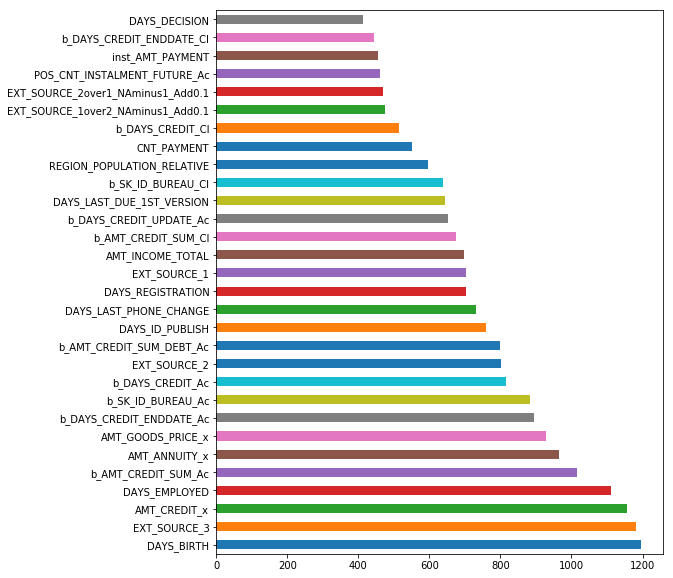

In [58]:
feat_imp = pd.Series(clf_final.feature_importances_, index=application_train_ohe2.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [59]:
probabilities = clf_final.predict_proba(application_test_ohe2.drop(['SK_ID_CURR'], axis=1))
submission = pd.DataFrame({
    'SK_ID_CURR': application_test_ohe2['SK_ID_CURR'],
    'TARGET':     [ row[1] for row in probabilities]
})
submission.to_csv("submission4.csv", index=False)